# Hierarchical Clustering Assignment

# Understanding the Business Requirement

In [1]:
#_____________________DATA________________________
#the data set has details of various Hollywood movies
#It is in a text format, each column is separated by a | (pipe)
# there are no column names. the names of the columns are as below- use these
# "ID","Title","Release_Date","Video_Release_Date","IMDB",
#"Unknown","Action",#"Adventure","Animation","Childrens","Comedy","Crime","Documentary"
#"Drama","Fantasy","FilmNoir","Horror","Musical","Mystery","Ramance","Sci-fi",
#"Thriller","War","Western"
#the column names Unknown to Western are all genre of the movies--
#Unknown means--Genre for that movies unknown.

#___________________REQUIREMENT__________________

#so you have data on several movies. We will use a content filtering approach of reccomendation system
# that is. we wil only use the properties of the movies to create similar groups
#if you forgot what is Content & Collaborative filtering, go back to the classroom videos.
#We will create some groups of similar movies and if a person like any movie in a group 
#we will recommend him other movies in the same group. This is a very basic RECMMENDATION ENGINE.
#of course what companies like amazon,netflix,etc use are complex algorithms but this forms the base.

# Data Cleaning

In [9]:
#Clean the data and get rid of unwanted columns that you feel will not be used for Clustering.
#there might be duplicate rows in the data. Get rid of those as well.
# bring the data to a well structured format to start the clustering process

import pandas as pd
import numpy as np
columns=["ID","Title","Release_Date","Video_Release_Date","IMDB","Unknown","Action",
         "Adventure","Animation","Childrens","Comedy","Crime","Documentary",
        "Drama","Fantasy","FilmNoir","Horror","Musical","Mystery","Ramance","Sci-fi",
        "Thriller","War","Western"]
df=pd.read_csv("data.txt",sep="|",names=columns)

In [38]:
df.head()
# ID is just seriel number, I can idetify the movie from its Tilte
#Release Data, Video_release date is not needed for clustering
# IMDB is just the IMDB link-not needed
#cleaning the data
#lets see of there are duplicates in the dataframe-
print sum(df.duplicated('Title'))#so there are some duplicates. Lets remove the duplicates
#we can also use this to find which movies are repeating more tahn once
#names = df.Title.value_counts()
#print names[names > 1]
print df.shape

#delete duplicates
df.drop_duplicates(subset=['Title'],inplace=True)
print df.shape # deleted 18 duplicates..
#remove unwanted columns--
movies=df.drop(['ID','Release_Date','Video_Release_Date','IMDB'],axis=1)
print movies.head()

0
(1664, 24)
(1664, 24)
               Title  Unknown  Action  Adventure  Animation  Childrens  \
0   Toy Story (1995)        0       0          0          1          1   
1   GoldenEye (1995)        0       1          1          0          0   
2  Four Rooms (1995)        0       0          0          0          0   
3  Get Shorty (1995)        0       1          0          0          0   
4     Copycat (1995)        0       0          0          0          0   

   Comedy  Crime  Documentary  Drama  Fantasy  FilmNoir  Horror  Musical  \
0       1      0            0      0        0         0       0        0   
1       0      0            0      0        0         0       0        0   
2       0      0            0      0        0         0       0        0   
3       1      0            0      1        0         0       0        0   
4       0      1            0      1        0         0       0        0   

   Mystery  Ramance  Sci-fi  Thriller  War  Western  
0        0        0 

# Hierarchical Clustering 

In [39]:
#Write of codes for hierarchical clusering here-
from scipy.cluster.hierarchy import dendrogram, linkage #this will be useful for heirarchical Clusters
import matplotlib.pyplot as plt
%matplotlib inline

Z = linkage(movies.drop(['Title'],axis=1), 'ward')#to clauclate dist, pass all variables except Title

# deciding number of clusters

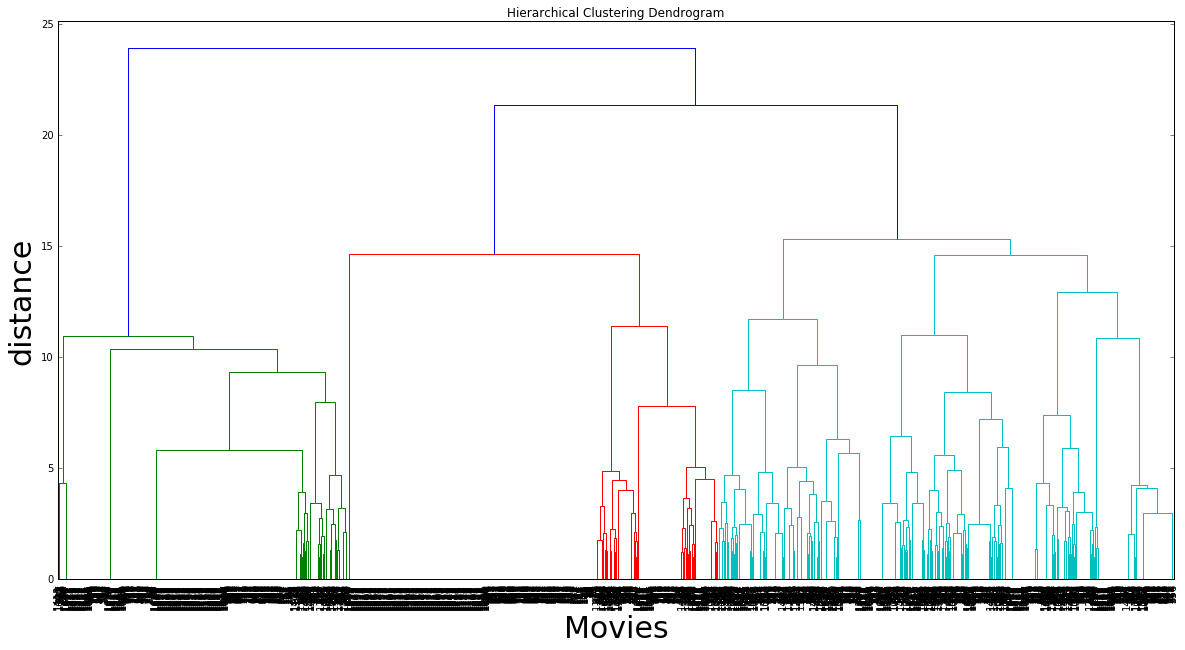

In [41]:
#draw the dendogram and decide what is the best choice of the number of clusters.
#Dont just decide based on dendogram, the # of clusters should also make sense.
#Use your understanding of movies to decide, int how many groups should you divide all exsting movies
#e.g. May be Action, War, Adventure, Sci-fi genre can be put in one group, similarly for others..

# calculate full dendrogram
plt.figure(figsize=(20, 10))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Movies',fontsize=30)
plt.ylabel('distance',fontsize=30)
dendrogram(Z,leaf_rotation=90.,leaf_font_size=10)
# leaf_rotation -----rotates the x axis labels
# leaf_font_size----font size for the x axis labels
plt.show()
# you see the black color at the botton because there are too many movies. It it wont affect our 
#understanding.

# Create the clusters

In [63]:
#we can clearly see that the dendogram suggests taking 3 clusters--ie we keep a horizontal line
#between distance(y axis) 15-20. this will have maximum free movement.
#BUT AT TEH SAME TIE I FEEL HAVING JUST 3 TYPES OF MOVIES WILL NOT MAKE MUCH SENSE. SO I WILL SELCT 
#8 CLUSTERS.. I WILL ASSUME THERE ARE OVERALL 7 TYPES OF MOVIES
from scipy.cluster.hierarchy import fcluster
k=7 #from BUSINESS UNDERSTANDING
clusters = fcluster(Z, k, criterion='maxclust') 

In [64]:
#Add the cluster Numbers into the cleaned DataFrame that you used earlier.
movies['Cluster']=clusters
movies.head(4)

,Title,Unknown,Action,Adventure,Animation,Childrens,Comedy,Crime,Documentary,Drama,...,FilmNoir,Horror,Musical,Mystery,Ramance,Sci-fi,Thriller,War,Western,Cluster
0,Toy Story (1995),0,0,0,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,6
1,GoldenEye (1995),0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,4
2,Four Rooms (1995),0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,5
3,Get Shorty (1995),0,1,0,0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,1


# Present your results

In [69]:
#prove that the Clustering that you have done Makes sense. Study Each CLuster that you have formed.
#May be descriptive statistics of each clusters might help.
#Do somethg to convince your audience. Create some plots..

#lest see the 3 of ovies in each cluster
print movies['Cluster'].value_counts()

#lets see which genres occupy most of the Cluster 1,2 and so on-
movies_plot=movies.groupby(['Cluster']).mean()
movies.groupby(['Cluster']).mean()

1    433
2    370
4    242
5    230
3    182
7    119
6     88
Name: Cluster, dtype: int64


,Unknown,Action,Adventure,Animation,Childrens,Comedy,Crime,Documentary,Drama,Fantasy,FilmNoir,Horror,Musical,Mystery,Ramance,Sci-fi,Thriller,War,Western
Cluster,,,,,,,,,,,,,,,,,,,
1,0.000000,0.064665,0.027714,0.000000,0.009238,0.921478,0.002309,0.000000,0.210162,0.000000,0.000000,0.004619,0.080831,0.000000,0.207852,0.006928,0.002309,0.004619,0.055427
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.000000,0.181319,0.087912,0.005495,0.010989,0.065934,0.010989,0.005495,0.593407,0.000000,0.005495,0.000000,0.000000,0.000000,0.730769,0.032967,0.093407,0.357143,0.005495
4,0.008264,0.681818,0.400826,0.020661,0.144628,0.041322,0.028926,0.000000,0.169421,0.037190,0.000000,0.057851,0.012397,0.008264,0.000000,0.330579,0.309917,0.016529,0.008264
5,0.000000,0.086957,0.026087,0.000000,0.008696,0.130435,0.417391,0.000000,0.365217,0.004348,0.100000,0.017391,0.000000,0.252174,0.065217,0.030435,0.621739,0.000000,0.000000
6,0.000000,0.034091,0.022727,0.409091,0.875000,0.454545,0.011364,0.000000,0.159091,0.136364,0.000000,0.000000,0.204545,0.000000,0.045455,0.045455,0.011364,0.000000,0.000000
7,0.000000,0.000000,0.000000,0.000000,0.000000,0.092437,0.000000,0.411765,0.067227,0.000000,0.000000,0.588235,0.000000,0.000000,0.016807,0.000000,0.092437,0.000000,0.000000


In [70]:
#above tells us the follwong--
#68% of action, 40% of adventure, 17% drama, 33%sci-fi, 30% thriller & 16.5% war movies ---> Cluster 4
#clusters 4 is probably what an Adult would prefer.

#sililarly Cluster 6 is mainly for children/Family..it comprises of 40% animation, 87% children, 45% comedy,
# & 20% musical..

#note that the total wont come to 100% as a movie can have multiple genres..

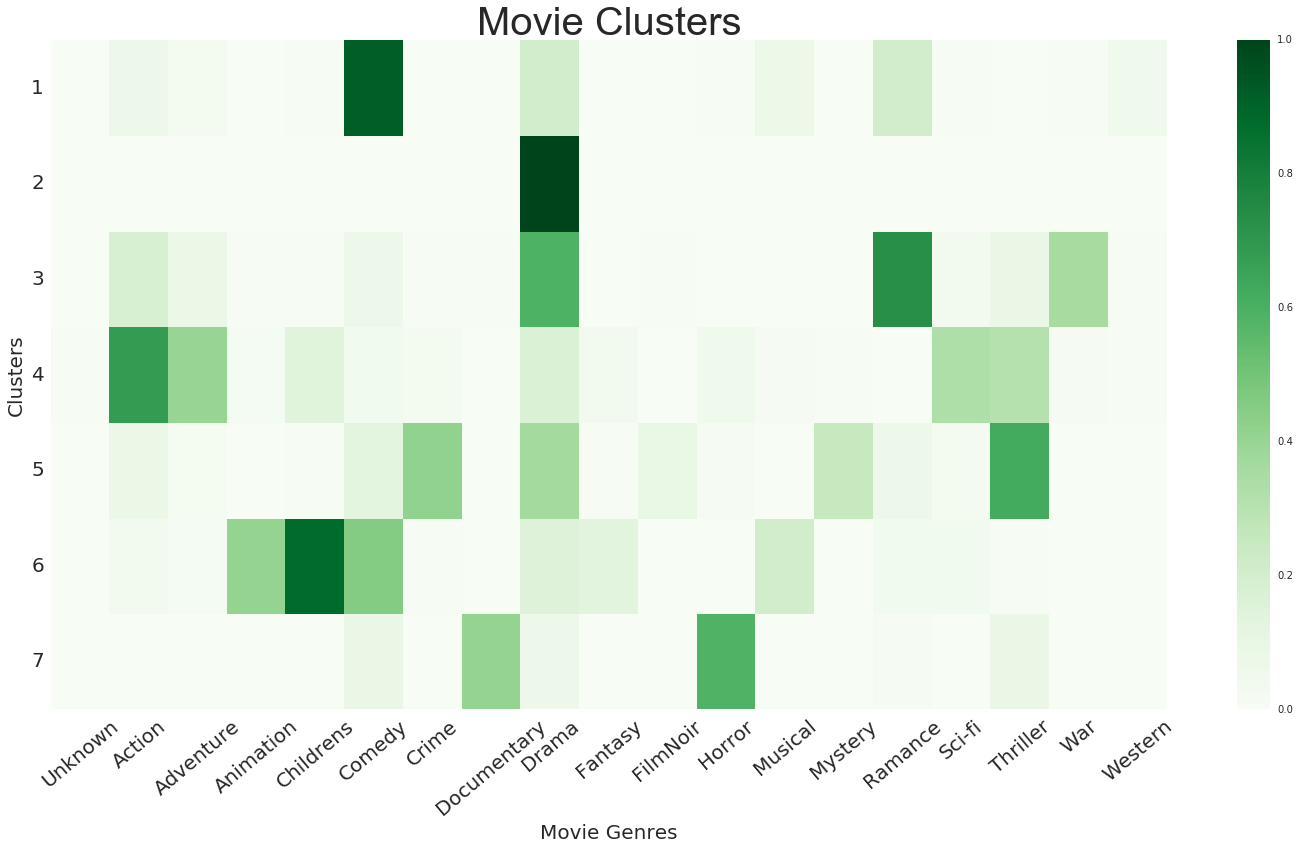

In [113]:
#lets plot the above..
import seaborn as sns
plt.figure(figsize=(25, 12))
g=sns.heatmap(movies_plot,cmap="Greens")# https://matplotlib.org/users/colormaps.html for some amazing colors
g.set_yticklabels(g.get_yticklabels(), rotation = 0, fontsize = 20)
g.set_xticklabels(g.get_xticklabels(), rotation = 40, fontsize = 20)
plt.title('Movie Clusters',fontsize=40)
plt.xlabel('Movie Genres',fontsize=20)
plt.ylabel('Clusters',fontsize=20)

In [128]:
#browse a few movies inneach cluster
movies[movies['Cluster']==6]['Title'].head() #children movies

0             Toy Story (1995)
7                  Babe (1995)
62    Santa Clause, The (1994)
70       Lion King, The (1994)
71            Mask, The (1994)
Name: Title, dtype: object

In [115]:
#go relax, you have earned some free time.. Tomorrows going to brighter..

In [ ]:
#K measn part...

#Do that yourself..... on another day....you got the concept...